<h1>Installing Dependencies</h1>

In [1]:
pip install flask transformers torch tesseract pytesseract pyttsx3 pandas cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.7/249.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=78ce36333cf536c7ecd04d0ccff6b5490c48b9788b245bfd02288e840ae90e53
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [2]:
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,081 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123622 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [3]:
pip install language-tool-python

---
<h3>This code generates captions for images using the BLIP (Bootstrapping Language-Image Pre-training) model. It loads an image, processes it with `BlipProcessor`, and generates a descriptive caption based on the image content. The code runs on GPU if available for faster processing.</h3>


In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

def generate_caption(image_path):
    image = Image.open(image_path)
    inputs = blip_processor(image, return_tensors="pt").to(device)
    out = blip_model.generate(**inputs)
    caption = blip_processor.decode(out[0], skip_special_tokens=True)
    return caption


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

---
<h3>This code extracts text from an image using OCR (Optical Character Recognition) with pytesseract. It opens an image from the given path, applies Tesseract OCR to recognize any text, and returns the extracted text as a string.</h3>

In [5]:
import pytesseract

def extract_text_from_image(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text


---
<h3>This code uses Cohere's language model to answer a user question based on an image caption and optional OCR (text extracted from the image) if it passes a grammar check.

### How it Works:
1. **Grammar Check**: `is_grammatically_correct` uses `language_tool_python` to verify the OCR text.
   - If OCR text is grammatically correct, it is included in the prompt; otherwise, it’s excluded.
2. **Cohere Query**: `query_cohere` sends a prompt to Cohere's language model (`command-xlarge`) with the caption, optional OCR text, and user question.
   - The model generates a response based on this prompt, providing an answer to the question.

**Note :** To learning more about Cohere Api visit- https://docs.cohere.com/reference/about

In [13]:
import cohere
import language_tool_python

co = cohere.Client("Enter your API Key")  # Replace with your API key
tool = language_tool_python.LanguageTool('en-US')

def is_grammatically_correct(text):
    matches = tool.check(text)
    return len(matches) == 0

def query_cohere(caption, ocr_text, user_question):
    if is_grammatically_correct(ocr_text):
        prompt = f"Image Caption: {caption}\nExtracted Text: {ocr_text}\nUser Question: {user_question}\nAnswer:"
    else:
        prompt = f"Image Caption: {caption}\nUser Question: {user_question}\nAnswer:"

    response = co.generate(
        model="command-xlarge",
        prompt=prompt,
        max_tokens=100,
        temperature=0.75 #set temperature according to the level of formality needed
    )
    answer = response.generations[0].text.strip()
    return answer


---
<h3>This code provides a simple interactive application to display an image and allow the user to ask questions about it. Here’s a breakdown of its functionality:

### Key Components:

1. **Imports**: The code imports necessary libraries, including `matplotlib` for displaying images, `PIL` for image processing, and `warnings` to suppress warnings.

2. **Functions**:
   - **`process_image(image_path, user_question)`**:
     - Generates a caption for the image using the `generate_caption` function.
     - Extracts text from the image using the `extract_text_from_image` function.
     - Queries a language model (via `query_cohere`) with the caption, extracted text, and user question.
     - Returns the generated caption, OCR text, and answer.

   - **`display_image(image_path)`**:
     - Opens and displays the image using `matplotlib`.
     - Turns off the axis for a cleaner look.

3. **Main Execution Block**:
   - Sets `image_path` to the location of the image file (you need to replace `"image_path"` with the actual path).
   - Displays the image.
   - Enters an infinite loop, prompting the user to ask questions about the image. If the user types "quit", the program exits.
   - For each question, it calls `process_image` to generate and print the caption and answer.

</h3>

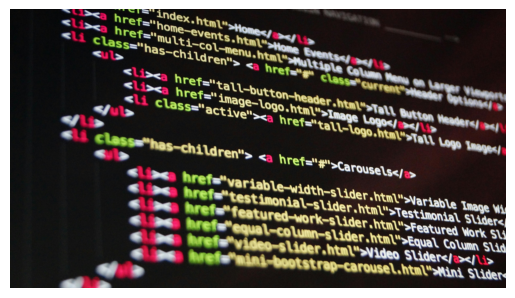


-------


Enter 'quit' to exit
Ask me questions about the image : describe the image
Caption: a computer screen with a bunch of code code
Answer: The image is of a computer screen displaying a code. The code appears to be written in a dark grey font and is contained in a single text file, judging by the extension at the end of the name at the top of the document.

-------


Enter 'quit' to exit
Ask me questions about the image : what programming lamguage is used in the image
Caption: a computer screen with a bunch of code code
Answer: The programming language used in the image is HTML. HTML, or Hypertext Markup Language, is used to create web pages and applications and is a crucial coding language for developing websites. This is evident due to the image showing a webpage in the process of being made.

-------


Enter 'quit' to exit
Ask me questions about the image : tell me about the code used in this image in short
Caption: a computer screen with a bunch of code code
Answer: The cod

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


def process_image(image_path, user_question):

    caption = generate_caption(image_path)


    ocr_text = extract_text_from_image(image_path)

    answer = query_cohere(caption, ocr_text, user_question)

    return caption, ocr_text, answer

def display_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    plt.pause(0.1)

if __name__ == "__main__":
    image_path = "image_path"  # Replace with the actual path to your image file
    display_image(image_path)

    while True:
        print("\n-------\n")
        print("\nEnter 'quit' to exit")
        user_question = input("Ask me questions about the image : ")
        if user_question.lower() == "quit":
            print("Exiting the program. Goodbye!")
            break

        caption, ocr_text, answer = process_image(image_path, user_question)
        print("Caption:", caption)
        #print("OCR Text:", ocr_text) # Uncomment to display the extracted text
        print("Answer:", answer)
